In [1]:
import tensorflow as tf
import os

In [2]:
!pip list


Package                      Version
---------------------------- ---------------------
absl-py                      1.4.0
anyio                        3.5.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
array-record                 0.4.1
asttokens                    2.0.5
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.11.0
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       4.1.0
Brotli                       1.0.9
cachetools                   5.3.2
certifi                      2023.11.17
cffi                         1.16.0
chardet                      5.2.0
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
comm                         0.1.2
contourpy                    1.2.0
cryptography                 41.0.3
cycler                       0.12.1
debugpy                 

In [2]:
# Avoid OOM erros by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


In [3]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [4]:
data_dir = "data"

In [ ]:
os.listdir(os.path.join(data_dir,"happy"))

In [32]:
image_exts = ["jpeg","jpg","bmp","png"]

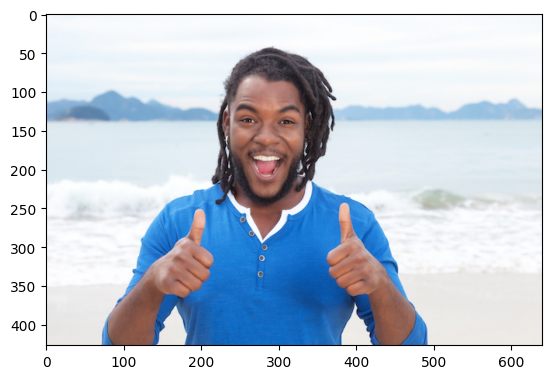

In [6]:
image = cv2.imread(os.path.join(data_dir, "happy","Happy-Guy.jpg"))
type(image)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir, image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
                print("Issue with image {}".format(image_path))

Issue with image data\happy\05-12-21-happy-people.jpg
Issue with image data\happy\1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg
Issue with image data\happy\1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
Issue with image data\happy\110754-utyeqqosky-1547658396.jpeg
Issue with image data\happy\170404-happy-workers-feature.jpg
Issue with image data\happy\1920px-face-smile.svg_.png.jpg
Issue with image data\happy\1961996_stock-photo-group-of-happy-people.jpg
Issue with image data\happy\1HEoLBLidT2u4mhJ0oiDgig.png
Issue with image data\happy\1zgJ8mDXVYwNY_5KkZr9Wzw.jpeg
Issue with image data\happy\20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg
Issue with image data\happy\35438_hd.jpg
Issue with image data\happy\56f455011e0000b300705475.jpeg
Issue with image data\happy\7-principles-of-successful-and-happy-people.png
Issue with image data\happy\8e06de1bf2171da2312b6de61c61e4bc.jpg
Issue with image data\happy\A_Sep20_14_1189155141.jpg
Issue with image da

In [ ]:
tf.data.Dataset??

In [9]:
import numpy as np

In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [11]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 163 files belonging to 2 classes.


In [12]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
data_iterator

In [15]:
# Get another batch from iterator
batch = data_iterator.next()

In [16]:
len(batch)

2

In [17]:
# Class 0 - Happy People
# Class 1 - Sad People
batch[0].shape

(32, 256, 256, 3)

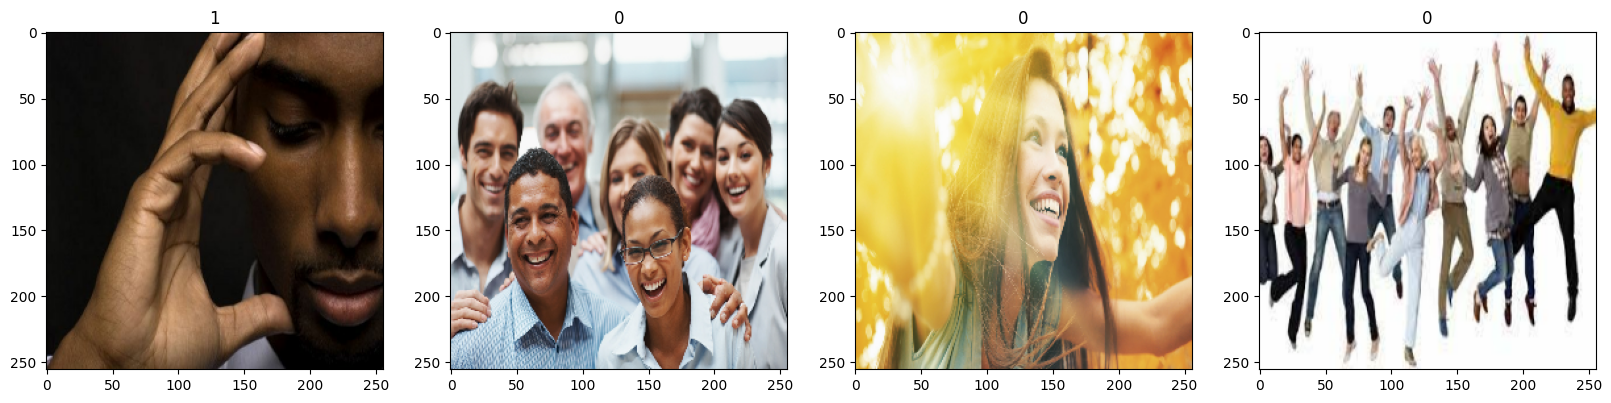

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    # ax[idx].imshow(img) 
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [109]:
scaled = batch[0] /255
scaled.max()

1.0

In [110]:
data = data.map(lambda x,y: (x/255,y))

In [111]:
data.as_numpy_iterator().next()[0].max()

1.0

In [122]:
len(data)

6

In [118]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [123]:
train_size+val_size+test_size

6

In [124]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [127]:
model = Sequential()

In [129]:
# Multiple layer in Deep Neural Network

model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add((Conv2D(32, (3,3), 1, activation="relu")))
model.add(MaxPooling2D())

model.add((Conv2D(16, (3,3), 1, activation="relu")))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))        

In [130]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [131]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)      

In [132]:
logdir = 'logs'

In [133]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [134]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 14s 1s/step - loss: 0.6736 - accuracy: 0.5859 - val_loss: 0.6051 - val_accuracy: 0.5625
Epoch 2/20
4/4 [==============================] - 2s 400ms/step - loss: 0.5871 - accuracy: 0.6016 - val_loss: 0.5896 - val_accuracy: 0.8125
Epoch 3/20
4/4 [==============================] - 2s 411ms/step - loss: 0.5266 - accuracy: 0.8047 - val_loss: 0.4102 - val_accuracy: 0.7188
Epoch 4/20
4/4 [==============================] - 2s 382ms/step - loss: 0.3736 - accuracy: 0.8125 - val_loss: 0.2053 - val_accuracy: 0.9375
Epoch 5/20
4/4 [==============================] - 2s 412ms/step - loss: 0.3040 - accuracy: 0.9062 - val_loss: 0.2875 - val_accuracy: 0.9062
Epoch 6/20
4/4 [==============================] - 2s 399ms/step - loss: 0.1921 - accuracy: 0.9141 - val_loss: 0.2240 - val_accuracy: 0.9688
Epoch 7/20
4/4 [==============================] - 2s 403ms/step - loss: 0.1968 - accuracy: 0.9609 - val_loss: 0.1200 - val_accuracy: 0.9375
Epoch 8/20
4/4 [======

In [136]:
hist.history

{'loss': [0.6736370325088501,
  0.5871026515960693,
  0.5265505313873291,
  0.37362971901893616,
  0.3039686381816864,
  0.19210699200630188,
  0.19681791961193085,
  0.15609002113342285,
  0.18015186488628387,
  0.09155567735433578,
  0.05726059153676033,
  0.04058229178190231,
  0.044709570705890656,
  0.040063079446554184,
  0.01809908077120781,
  0.02055738866329193,
  0.017031965777277946,
  0.006255007814615965,
  0.004963545128703117,
  0.0027808528393507004],
 'accuracy': [0.5859375,
  0.6015625,
  0.8046875,
  0.8125,
  0.90625,
  0.9140625,
  0.9609375,
  0.9453125,
  0.9375,
  0.9921875,
  1.0,
  0.9921875,
  0.984375,
  0.9765625,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.6050662994384766,
  0.5895546674728394,
  0.41024595499038696,
  0.20525552332401276,
  0.2875216603279114,
  0.22404175996780396,
  0.11998162418603897,
  0.16837772727012634,
  0.14473652839660645,
  0.06258202344179153,
  0.043217286467552185,
  0.0065899016335606575,
  0.01406843308359

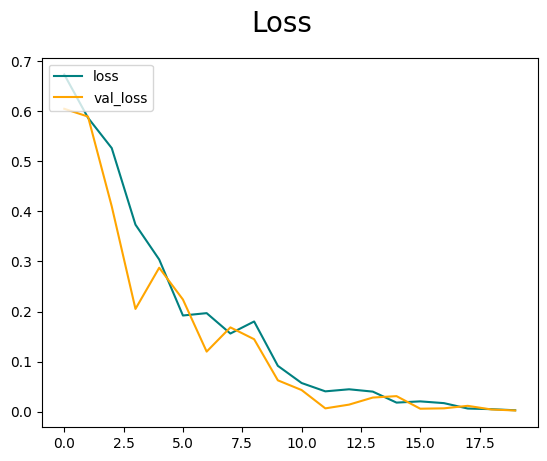

In [138]:
fig = plt.figure()
plt.plot(hist.history['loss'], color="teal", label="loss")
plt.plot(hist.history['val_loss'], color="orange", label="val_loss")
plt.suptitle("Loss", fontsize=20)
plt.legend(loc="upper left")
plt.show()

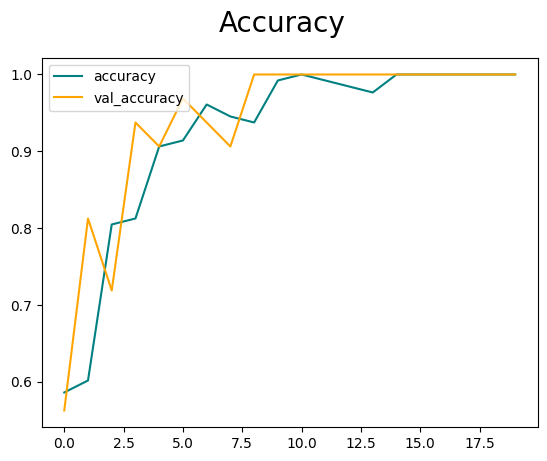

In [140]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color="teal", label="accuracy")
plt.plot(hist.history['val_accuracy'], color="orange", label="val_accuracy")
plt.suptitle("Accuracy", fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [141]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [142]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [143]:
len(test)

1

In [144]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 337ms/step


In [145]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


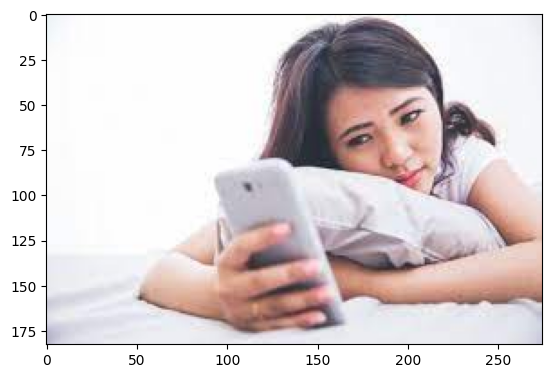

In [159]:
img = cv2.imread("sad.jpeg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

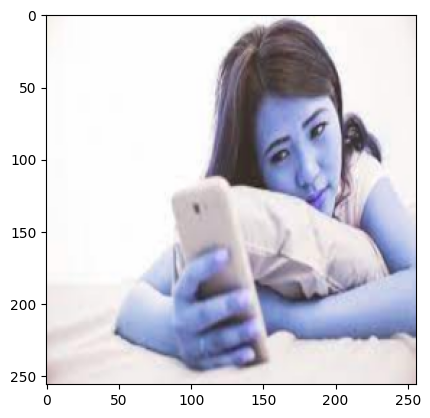

In [174]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [161]:
resize

TensorShape([256, 256, 3])

In [162]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [163]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 23ms/step


In [164]:
yhat

array([[0.9355578]], dtype=float32)

In [166]:
if yhat > 0.5:
    print(f'Predicted Class is Sad.')
else:
    print(f'Predicted Class is Happy.')

Predicted Class is Sad.


In [167]:
from tensorflow.keras.models import load_model

In [168]:
model.save(os.path.join('models', 'happysadmodel.h5'))

In [169]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [170]:
new_model

In [171]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 105ms/step


array([[0.9355578]], dtype=float32)

In [172]:
if yhat > 0.5:
    print(f'Predicted Class is Sad.')
else:
    print(f'Predicted Class is Happy.')

Predicted Class is Sad.
